In [3]:
import sys
!{sys.executable} -m pip install pandas

   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.6 MB 2.2 MB/s eta 0:00:06
    --------------------------------------- 0.2/11.6 MB 2.5 MB/s eta 0:00:05
   - -------------------------------------- 0.4/11.6 MB 2.5 MB/s eta 0:00:05
   - -------------------------------------- 0.5/11.6 MB 2.5 MB/s eta 0:00:05
   -- ------------------------------------- 0.6/11.6 MB 2.5 MB/s eta 0:00:05
   -- ------------------------------------- 0.7/11.6 MB 2.4 MB/s eta 0:00:05
   -- ------------------------------------- 0.8/11.6 MB 2.5 MB/s eta 0:00:05
   --- ------------------------------------ 1.0/11.6 MB 2.5 MB/s eta 0:00:05
   --- ------------------------------------ 1.1/11.6 MB 2.5 MB/s eta 0:00:05
   ---- ----------------------------------- 1.2/11.6 MB 2.5 MB/s eta 0:00:05
   ---- ----------------------------------- 1.3/11.6 MB 2.5 MB/s eta 0:00:05
   ---- ----------------------------------- 1.4/11.6 MB 2.5 MB/s eta 0:00:05
   ---


[notice] A new release of pip is available: 23.3.2 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nptdms import TdmsFile
from pathlib import Path
import math
import pathlib
import os
# importing sys
import sys
nb_path = Path.cwd()

In [6]:
print("fsdfd\n")

fsdfd



In [13]:
pack_path = nb_path.parent / "arenz_group_python"
print(nb_path.parent)
print(pack_path)
print(f"path existits: {pack_path.exists()}")

c:\Users\gusta\Documents\GitHub\Arenz_Group_Python
c:\Users\gusta\Documents\GitHub\Arenz_Group_Python\arenz_group_python
path existits: True


In [29]:
#add
sys.path.insert(0,pack_path)
import arenz_group_python

ModuleNotFoundError: No module named 'arenz_group_python'

In [36]:
str_path = str(pack_path)
#sys.path.append("C:/Users/gustav.wiberg/Documents/GitHub/Python/Arenz_Group_Python/src/ArenzGroupPython")
print(str_path)
sys.path.append(str_path)
#import ec_data
#ec_data.reload()
import ec_data.ec_data as aaa

from ec_data.ec_data import EC_Data




c:\Users\gusta\Documents\GitHub\Arenz_Group_Python\arenz_group_python


ModuleNotFoundError: No module named 'arenz_group_python'

In [16]:
test_file_path = nb_path / "data" / "Steps_102346.tdms"
print(test_file_path)
print(f"path existits: {test_file_path.exists()}")

test_dataSet = EC_Data(test_file_path)
test_dataSet.plot("E","i")

c:\Users\gusta\Documents\GitHub\Arenz_Group_Python\tests\data\Steps_102346.tdms
path existits: True


NameError: name 'EC_Data' is not defined

In [ ]:
#data import from tdms-file:

test_file_path = nb_path 
#data in the folder, e.g.
tdms_file = TdmsFile.read("data/Steps_102346.tdms")
tdms_file_groups = tdms_file.groups()
tdms_file_df = tdms_file.as_dataframe()

di = tdms_file.properties
print(di)
print("File")
print(tdms_file.properties['name'])
print("proper")
for key, value in di.items():
    print(key, value)
#for key, value in tdms_file.properties().items():
#    print(key, value)


# grab the columns in the file
tdms_file_groupEC_i_file0s50mV = tdms_file_groups[0]['i']
tdms_file_groupEC_t_file0s50mV = tdms_file_groups[0]['Time']
tdms_file_groupEC_E_file0s50mV = tdms_file_groups[0]['E']
tdms_file_groupEC_R_file0s50mV = tdms_file_groups[0]['Z_E']

# rename and create a numpy-array with the data
current_file0s50mV = tdms_file_groupEC_i_file0s50mV.data
time_file0s50mV = tdms_file_groupEC_t_file0s50mV.data
potential_file0s50mV = tdms_file_groupEC_E_file0s50mV.data
resistivity_file0s50mV = tdms_file_groupEC_R_file0s50mV.data

#check if it worked, e.g.:
print(current_file0s50mV)


# function
def displayText(path_to_TDMS_EC_data):
    print( "Geeks 4 Geeks !")

<Axes: xlabel='t / s', ylabel='E-IZ / V'>

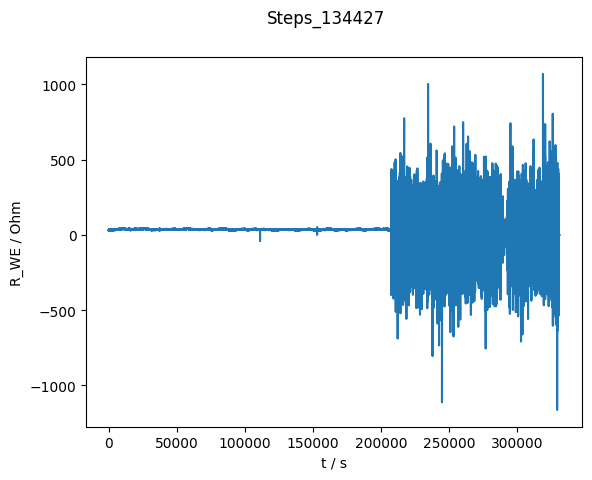

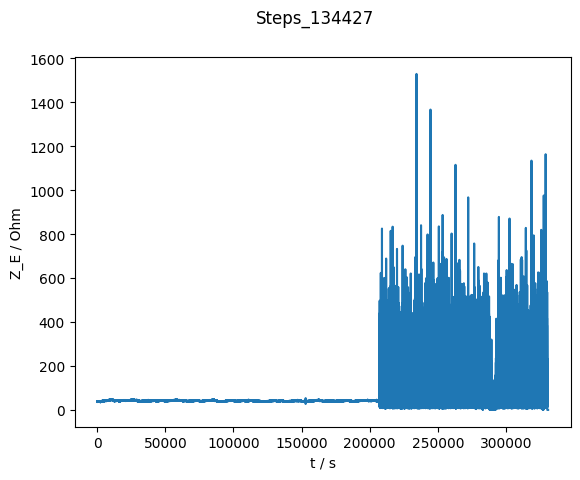

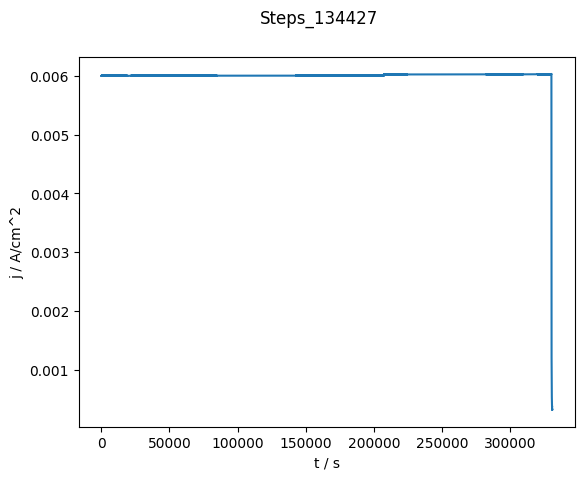

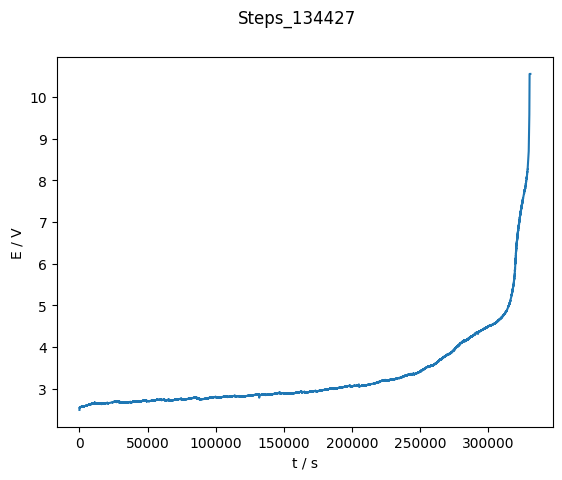

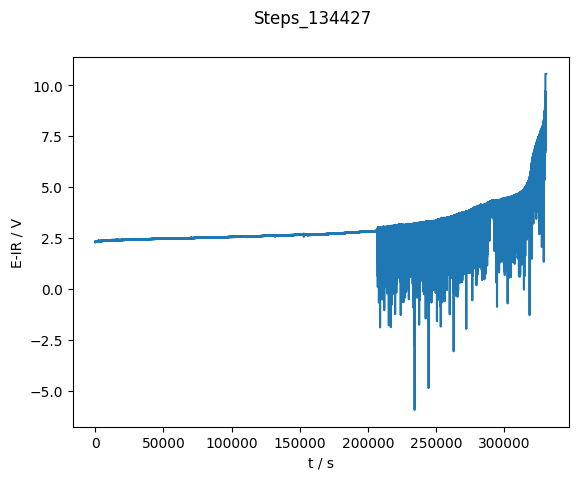

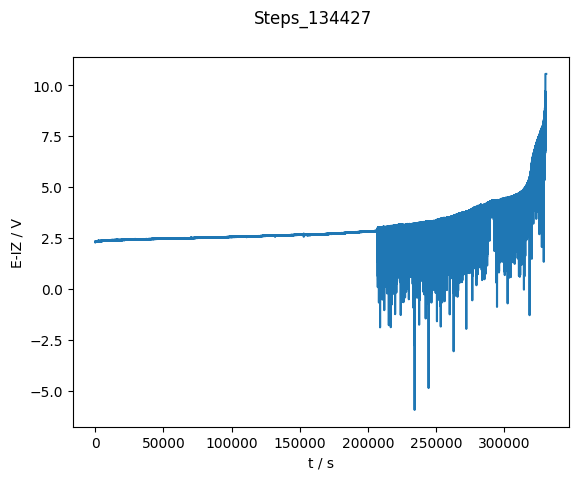

In [26]:
test_file_path = pathlib.PureWindowsPath('c:\temp\Steps_134427.tdms')
#print(test_file_path)pathlib.PureWindowsPath
#print(f"path existits: {test_file_path.exists()}")

test_dataSet = EC_Data("c:/temp/Steps_134427.tdms")
test_dataSet.plot("Time","R_E")
test_dataSet.plot("Time","Z_E")
test_dataSet.plot("Time","j")

test_dataSet.plot("Time","E")
test_dataSet.plot("Time","E-IR")
test_dataSet.plot("Time","E-IZ")

<Axes: xlabel='t / s', ylabel='E-IZ / V'>

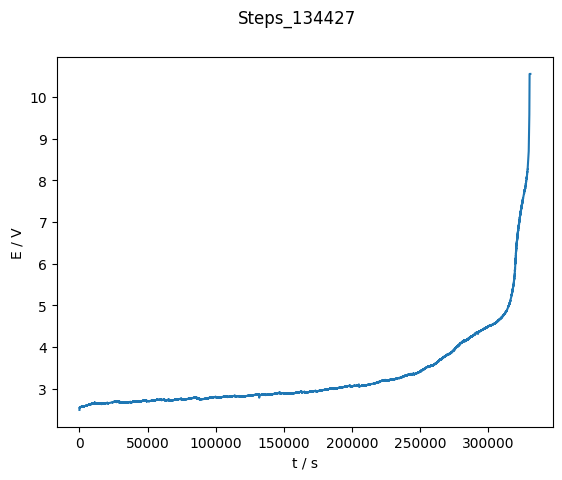

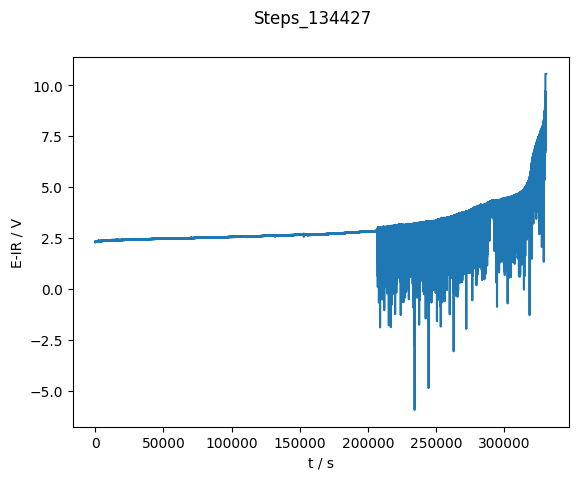

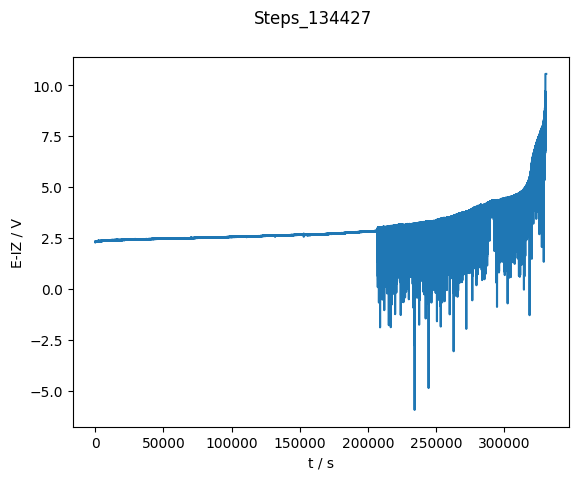

In [9]:

test_dataSet.plot("Time","E")
test_dataSet.plot("Time","E-IR")
test_dataSet.plot("Time","E-IZ")

In [27]:
np.savetxt('data.csv', [test_dataSet.Time, test_dataSet.E, test_dataSet.i,test_dataSet.Z_E], delimiter=';', header="Time;E;i;Z_E;",fmt=["%2.4f"," %2.3f"," %1.4e", "%1.4e"])

AttributeError: fmt has wrong shape.  ['%2.4f', ' %2.3f', ' %1.4e', '%1.4e']

In [126]:
E_iz,a,b=test_dataSet.get_channel("E-IZ")
E_ir,a,b=test_dataSet.get_channel("E-IZ")
print(f"Phase_E: {len(test_dataSet.Phase_E)}")
E_iz,a,b=test_dataSet.get_channel("E-IZ")
print(f"E-IZ: {len(E_iz)}")
print(f"E-IZ: {len(E_ir)}")
data_arr= [test_dataSet.Time, test_dataSet.E, test_dataSet.i,test_dataSet.Z_E,test_dataSet.Phase_E ,E_iz, E_ir]

maxIndex = math.floor(len(E_ir) / 10)
print(f"maxindex: {maxIndex}")
data_r = np.ndarray(shape=(maxIndex), dtype=float, order='F')
data_red =[data_r, data_r, data_r, data_r, data_r, data_r]
print(data_red)
print(data_arr)

data_i = np.ndarray(shape=(maxIndex), dtype=np.dtype(np.int64), order='F')
r_Time = np.ndarray(shape=(maxIndex), dtype=float, order='F')
r_E = np.ndarray(shape=(maxIndex), dtype=float, order='F')
r_i = np.ndarray(shape=(maxIndex), dtype=float, order='F')
r_Z = np.ndarray(shape=(maxIndex), dtype=float, order='F')
r_p = np.ndarray(shape=(maxIndex), dtype=float, order='F')
r_Eiz = np.ndarray(shape=(maxIndex), dtype=float, order='F')
r_Eir = np.ndarray(shape=(maxIndex), dtype=float, order='F')
for x in range(maxIndex):
    r_Time[x] = test_dataSet.Time[x*10]
    r_E[x] = test_dataSet.E[x*10]
    r_i[x] = test_dataSet.i[x*10]
    r_Z[x] = test_dataSet.Z_E[x*10]
    r_p[x] = test_dataSet.Phase_E[x*10]
    r_Eiz[x] = E_iz[x*10]
    r_Eir[x] = E_ir[x*10]

print("time")
print(r_Time[range(5)])
data_red = np.ndarray(shape=(6, maxIndex), dtype=float, order='F')
data_red2 =[r_Time, r_E, r_i, r_Z,r_p, r_Eiz, r_Eir]
data_red[0]=r_Time
data_red[1]=r_E
data_red[2]=r_i
data_red[3]=r_Z
data_red[4]=r_p
print("time")
print(data_red)

data_red_t = np.transpose(data_red2)

print(data_red_t)

 

Phase_E: 3309402
E-IZ: 3309402
E-IZ: 3309402
maxindex: 330940
[array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.])]
[array([0.00000000e+00, 1.00008324e-01, 2.00016648e-01, ...,
       3.30967438e+05, 3.30967562e+05, 3.30967656e+05], dtype=float32), array([ 2.4911416,  2.495508 ,  2.4981334, ..., 10.55504  , 10.55504  ,
       10.55504  ], dtype=float32), array([0.00599781, 0.00599756, 0.00599771, ..., 0.00031587, 0.00031568,
       0.00031572], dtype=float32), array([3.6593884e+01, 3.7544403e+01, 3.8403255e+01, ..., 1.4721238e-10,
       1.5997978e-10, 1.3008002e-10], dtype=float32), array([ 5.66792   ,  5.7772856 ,  5.6750045 , ..., -5.3693333 ,
        4.4730716 ,  0.09663957], dtype=float32), array([ 2.2716582,  2.270333 ,  2.2678018, ..., 10.55504  , 10.55504  ,
       10.55504  ], dtype=float32), array([ 2.27

In [127]:


FormatOfwrite = ["%2.2f"," %2.3f"," %1.4e", "%1.4e", "%1.4e", "%1.4e","%1.4e"]
#print(data_arr.dim())

data_arr_t = np.transpose(data_red)
np.savetxt(str(f'{test_dataSet.name}.csv'), data_red_t, delimiter=';\t', header="Time;\tE;\ti;Z_E;\tPhase_E;\tE-i*Z; \tE-i*R", fmt=FormatOfwrite)

test_file_path = pathlib.PureWindowsPath('c:\temp\Steps_134427.tdms')
#print(test_file_path)pathlib.PureWindowsPath
#print(f"path existits: {test_file_path.exists()}")

test_dataSet = EC_Data("c:/temp/Steps_134427.tdms")
test_dataSet.plot("E","t")